In [ ]:
import tensorflow_hub as hub
import cv2
import numpy
import tensorflow as tf
import pandas as pd

# Carregar modelos
detector = hub.load("efficientdet_lite2_detection_1")
labels = pd.read_csv('labels.csv',sep=';',index_col='ID')
labels = labels['OBJECT (2017 REL.)']

cap = cv2.VideoCapture(0)

width = 512
height = 512

while(True):
    #Capture frame-by-frame
    ret, frame = cap.read()
    
    #Resize to respect the input_shape
    inp = cv2.resize(frame, (width , height ))

    #Convert img to RGB
    rgb = cv2.cvtColor(inp, cv2.COLOR_BGR2RGB)

    #Is optional but i recommend (float convertion and convert img to tensor image)
    rgb_tensor = tf.convert_to_tensor(rgb, dtype=tf.uint8)

    #Add dims to rgb_tensor
    rgb_tensor = tf.expand_dims(rgb_tensor , 0)
    
    boxes, scores, classes, num_detections = detector(rgb_tensor)
    
    pred_labels = classes.numpy().astype('int')[0]
    
    pred_labels = [labels[i] for i in pred_labels]
    pred_boxes = boxes.numpy()[0].astype('int')
    pred_scores = scores.numpy()[0]
    #loop throughout the faces detected and place a box around it
    
    for score, (ymin,xmin,ymax,xmax), label in zip(pred_scores, pred_boxes, pred_labels):
        if score < 0.5:
            continue
            
        score_txt = f'{100 * round(score,0)}'
        img_boxes = cv2.rectangle(rgb,(xmin, ymax),(xmax, ymin),(0,255,0),1)      
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img_boxes,label,(xmin, ymax-10), font, 0.5, (255,0,0), 1, cv2.LINE_AA)
        cv2.putText(img_boxes,score_txt,(xmax, ymax-10), font, 0.5, (255,0,0), 1, cv2.LINE_AA)



    #Display the resulting frame
    cv2.imshow('black and white',img_boxes)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()


2021-07-15 11:45:43.027544: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-07-15 11:45:59.548254: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/gabrielcassimiro/.pyenv/versions/3.8.6/envs/tensorflow/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/5_/640wy_152917k7tqvrr2wxk80000gn/T/ipykernel_5521/2656351129.py", line 33, in <module>
    boxes, scores, classes, num_detections = detector(rgb_tensor)
  File "/Users/gabrielcassimiro/.pyenv/versions/3.8.6/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/saved_model/load.py", line 670, in _call_attribute
    return instance.__call__(*args, **kwargs)
  File "/Users/gabrielcassimiro/.pyenv/versions/3.8.6/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/eager/def_function.py", line 889, in __call__
    result = self._call(*args, **kwds)
  File "/Users/gabrielcassimiro/.pyenv/versions/3.8.6/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/eager/def_function.py", line 924, in _call
    res

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/gabrielcassimiro/.pyenv/versions/3.8.6/envs/tensorflow/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/5_/640wy_152917k7tqvrr2wxk80000gn/T/ipykernel_5521/2656351129.py", line 33, in <module>
    boxes, scores, classes, num_detections = detector(rgb_tensor)
  File "/Users/gabrielcassimiro/.pyenv/versions/3.8.6/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/saved_model/load.py", line 670, in _call_attribute
    return instance.__call__(*args, **kwargs)
  File "/Users/gabrielcassimiro/.pyenv/versions/3.8.6/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/eager/def_function.py", line 889, in __call__
    result = self._call(*args, **kwds)
  File "/Users/gabrielcassimiro/.pyenv/versions/3.8.6/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/eager/def_function.py", line 924, in _call
    res

In [1]:
import tensorflow_hub as hub
import cv2
import numpy
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

In [2]:
# Apply image detector on a batch of image.
detector = hub.load("efficientdet_lite2_detection_1")


2021-07-15 12:49:54.649993: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:

width = 512
height = 512

#Load image by Opencv2
img = cv2.imread('dog_test.jpeg')
#Resize to respect the input_shape
inp = cv2.resize(img, (width , height ))

#Convert img to RGB
rgb = cv2.cvtColor(inp, cv2.COLOR_BGR2RGB)

#Is optional but i recommend (float convertion and convert img to tensor image)
rgb_tensor = tf.convert_to_tensor(rgb, dtype=tf.uint8)

#Add dims to rgb_tensor
rgb_tensor = tf.expand_dims(rgb_tensor , 0)

#Now you can use rgb_tensor to predict label for exemple :


In [4]:
boxes, scores, classes, num_detections = detector(rgb_tensor)

2021-07-15 12:50:11.193446: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


In [15]:
labels = pd.read_csv('labels_txt.csv',index_col='ID')

In [16]:
labels

,OBJECT (2017 REL.)
ID,
1,person
2,bicycle
3,car
4,motorcycle
5,airplane
...,...
87,scissors
88,teddy bear
89,hair drier


In [17]:
pred_labels = classes.numpy().astype('int')[0]

In [20]:
pred_labels

array([ 1, 18,  1, 18,  1, 15,  1, 18,  1, 37,  3, 18,  1, 34, 37, 15, 37,
       34, 37, 18, 18,  3,  1, 15, 15, 37, 18,  1, 18, 34, 37, 34,  1, 15,
        1, 34,  3, 40, 37, 34,  1, 34,  1,  3,  1, 18,  1,  1, 37, 15, 40,
        1, 34,  3,  1, 18, 40,  3,  1, 15, 34, 15, 40, 15, 34,  1, 37, 34,
        1, 18, 37, 37,  1, 18, 40, 18, 40,  1,  1, 40, 34, 15,  1, 15, 15,
       40, 37, 18, 37, 34, 15, 15, 34,  1,  1,  3, 34, 34, 15,  1])

In [22]:
labels.loc[1]

'person'

In [31]:
labels_tx = pd.read_csv('raspberry-pi-tensorflow/labels.csv',sep=';',index_col='ID')


In [33]:
labels_tx.shape

(91, 4)

In [26]:
pred_labels = [labels_tx.loc[i] for i in pred_labels]

KeyError: 'person'

In [27]:
pred_labels

['person',
 'dog',
 'person',
 'dog',
 'person',
 'bench',
 'person',
 'dog',
 'person',
 'sports ball',
 'car',
 'dog',
 'person',
 'frisbee',
 'sports ball',
 'bench',
 'sports ball',
 'frisbee',
 'sports ball',
 'dog',
 'dog',
 'car',
 'person',
 'bench',
 'bench',
 'sports ball',
 'dog',
 'person',
 'dog',
 'frisbee',
 'sports ball',
 'frisbee',
 'person',
 'bench',
 'person',
 'frisbee',
 'car',
 'baseball glove',
 'sports ball',
 'frisbee',
 'person',
 'frisbee',
 'person',
 'car',
 'person',
 'dog',
 'person',
 'person',
 'sports ball',
 'bench',
 'baseball glove',
 'person',
 'frisbee',
 'car',
 'person',
 'dog',
 'baseball glove',
 'car',
 'person',
 'bench',
 'frisbee',
 'bench',
 'baseball glove',
 'bench',
 'frisbee',
 'person',
 'sports ball',
 'frisbee',
 'person',
 'dog',
 'sports ball',
 'sports ball',
 'person',
 'dog',
 'baseball glove',
 'dog',
 'baseball glove',
 'person',
 'person',
 'baseball glove',
 'frisbee',
 'bench',
 'person',
 'bench',
 'bench',
 'baseball 

In [9]:
pred_boxes = boxes.numpy()[0].astype('int')

In [10]:
pred_scores = scores.numpy()[0]

In [12]:
for score, (ymin,xmin,ymax,xmax), label in zip(pred_scores, pred_boxes, pred_labels):
        if score < 0.5:
            continue
            
        img_boxes = cv2.rectangle(rgb,(xmin, ymax),(xmax, ymin),(0,255,0),1)      
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img_boxes,label,(xmin, ymax-10), font, 0.5, (255,0,0), 1, cv2.LINE_AA)


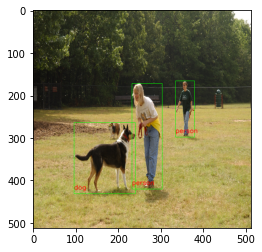

In [13]:
plt.imshow(rgb)

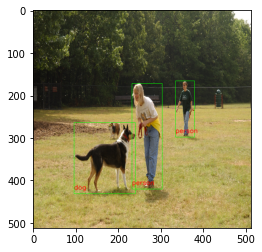

In [14]:
plt.imshow(img_boxes)

In [8]:
labels_txt = labels_txt['OBJECT (2017 REL.)']

In [6]:
labels_txt = pd.read_csv('labels.csv',sep=';',index_col='ID')

In [11]:
labels_txt.to_csv('labels_txt.csv')